# NYC RESTAURANT HEALTH INSPECTION VIOLATIONS ANALYSIS

![Grades ABC](http://brooklynink.wpengine.netdna-cdn.com/wp-content/uploads/2011/10/restaurant-ratings-abc-1031.jpg)

## What does an “A” rating actually mean?

### Created by Hubert Lin & Ekim Sarinoglu

New York City is famous for its nearly endless restaurant options. At many of our favorite restaurants, we do not think about the cleanliness of the preparation of the food once we see that the restaurant has passed its health inspection. But what does an “A” rating actually mean? We came across a dataset that showed that many of the places one would assume to be safe from unclean conditions given their health inspection grade, were actually not as clean as we would have thought. Here we will be presenting and testing our hypotheses about restaurants’ health inspection data from the five boroughs. We will be analyzing to see if trends exist between health inspection grades, violation scores, critical violations, and boroughs. 

### Where did we get the data?
NYC Open Data is a website that aggregates public data generated by various New York City agencies and organizations. We were able to retrieve a dataset with information about the results of restaurants inspections compiled by the New York City Department of Health & Mental Hygiene ("DOHMH"). The dataset contains 437,119 rows and 18 columns. Columns include information such as the name of restaurants, the boroughs, cuisines served, violation grades, descriptions of violations, and other relevant information.

### Our hypotheses:

#### "A" rated restaurants will have little to no "Critical" violations
The data contains a column that flags violations as Critical, Not Critical, and Not Applicable. Not Applicable flags are only given to those restaurants that did not have a violation during their inspection. Our hypothesis is that as the Health Inspection Grade falls (from A to B), the number of restaurants with critical violations will increase. We also hypothesize that 0% to 10% of restaurants with an A rating will have critical violations. 

#### We expect Manhattan to be cleaner than the rest of the boroughs

The data provides us with the location of each restaurant, including borough information. We can use this location data to see whether the restaurants around NYU are cleanlier than the average for other boroughs. We expect Manhattan to be cleaner than the average zip code in New York City. We hope to see which borough has the cleanest food preparation.

#### We expect that as violation scores go up, restaurant grades go down at distinct score levels

The data provides us with a "score" column. On the DOHMH website, they tell us that "each violation of a regulation gets a certain number of points. At the end of the inspection, the inspector totals the points, and this number is the restaurant's inspection score—the lower the score, the better the Grade." We decided to plot the series as a whole to see how many violations a typical restaurant in NYC gets. We expect to see clear cut off scores that go with the grade received. 


In [1]:
import sys                             # system module
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas
import seaborn as sns          # graphics

%matplotlib inline
# check versions
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version:  0.19.0
Today:  2016-12-22


/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%cd /Users/Hubert/Downloads

/Users/Hubert/Downloads


In [3]:
project = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [4]:
project = project[['DBA','BORO','ZIPCODE','CUISINE DESCRIPTION','CRITICAL FLAG','SCORE','GRADE']]

In [5]:
project = project.dropna()

In [6]:
project = project[project.GRADE != 'Z']
project = project[project.GRADE != 'P']
project = project[project.GRADE != 'Not Yet Graded']
project = project[project.BORO != 'Missing']
project = project[project.BORO != 'STATEN ISLAND']
project = project.reset_index()


## Here is what the Data looks like:

We cleaned the data to include only the relevant information. The variables we decided to include are: name of the restaurant, Borough of the restaurant, zipcode of the restaurant, cuisine served, critical flag information, violation score, and grade received. We also cleaned the data to only show grades A, B, and C, eliminating pending and non-graded restaurants. We also decided to exclude Staten Island. 

In [7]:
project.head()

,index,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,CRITICAL FLAG,SCORE,GRADE
0,2,NEW YORK BAGELS & DELI,MANHATTAN,10016,Bagels/Pretzels,Not Critical,12.0,A
1,3,BOTTEGA FALAI,MANHATTAN,10012,CafÃ©/Coffee/Tea,Not Critical,26.0,B
2,5,CHECKERS,BROOKLYN,11211,Hamburgers,Critical,7.0,A
3,7,DOUBLE TOP CHINA & TORTILLA TACO,BROOKLYN,11210,Chinese,Critical,9.0,A
4,9,DUE FRATELLI,QUEENS,11372,Pizza/Italian,Critical,28.0,C


## Our first plot of the data

## Boroughs and their grade distributions

We plotted the grade information and separated the grades by borough. There are more restaurants in Manhattan than other burroughs, and therefore Manhattan has more A rated restaurants. This plot simply shows the amount of restaurants in each borough with each grade. We will analyze the percentage of A rated restaurants in each borough later. Manhattan has the most restaurants. Brooklyn and Queens have about the same number of restaurants. Bronx has the lowest amount of restaurants.

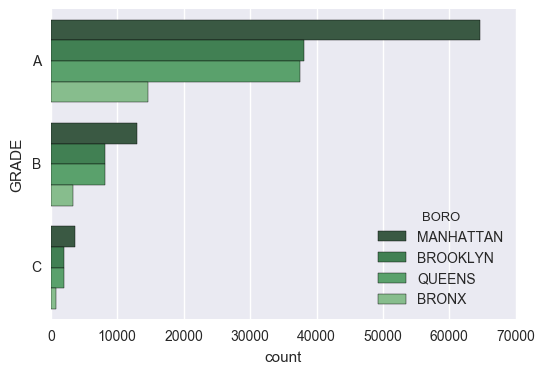

In [8]:
sns.countplot(y='GRADE',data=project,hue='BORO',palette='Greens_d')
plt.style.use("fivethirtyeight")

In [9]:
criticalgraph = project[["CRITICAL FLAG", "GRADE"]]

In [10]:
critnona = criticalgraph.dropna()

## Grade distribution is roughly normal

The grades seem to follow a normal distribution, meaning that it roughly fits a bell curve. Our data indicated that 79% of restaurants receive an A rating, 17% receive a B rating, and 4% receive a C rating. Our initial analysis suggests that there does not seem to be a correlation between grade scores and borough, even though we hypothesized that the Bronx would have lower grades than Manhattan.

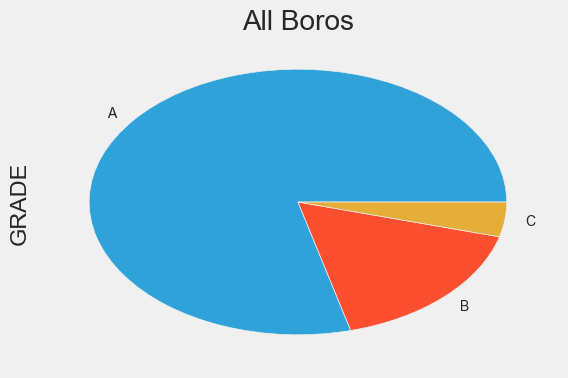

In [11]:
critnona["GRADE"].value_counts().plot(kind="pie", title = "All Boros")

In [12]:
per = critnona["GRADE"].value_counts()

In [13]:
per["per"] = critnona["GRADE"].value_counts()/(154922+32740+8261)

In [14]:
per

A                                                 154762
B                                                  32700
C                                                   8266
per    A    0.789912
B    0.166902
C    0.042190
Name...
Name: GRADE, dtype: object

In [15]:
critnona["combined"] = critnona["CRITICAL FLAG"] + critnona["GRADE"]

In [16]:
criticalandgrade = critnona["combined"].value_counts()

In [17]:
dfcritgradeabc = criticalandgrade.iloc[[1,2,4]]

In [18]:
dfcritgradeabc = dfcritgradeabc.reset_index()

In [19]:
gradeseries = critnona["GRADE"].value_counts()

In [20]:
gradeseriesABC = gradeseries.head(3)

In [21]:
gradeseriesABC = gradeseriesABC.reset_index()

In [22]:
gradeseriesABC = gradeseriesABC.rename(columns={'index': 'Grade', 'GRADE': 'Number'})

In [23]:
dfcrit = pd.concat([dfcritgradeabc,gradeseriesABC], axis=1)

In [24]:
dfcrit["Percentage With Critical Violation"] = dfcrit["combined"]/dfcrit["Number"]

In [25]:
dfcrit = dfcrit.set_index("index")

In [26]:
dfcrit["Percentage With Critical Violation"]=dfcrit["Percentage With Critical Violation"] * 100

In [27]:
dfcrit["Percentage With Critical Violation"]

index
CriticalA    48.307724
CriticalB    68.311927
CriticalC    67.578030
Name: Percentage With Critical Violation, dtype: float64

## Almost 50% of A rated restaurants have one or more "critical" violations

The figure below shows that 48.3% of A rated restaurants have one or more "critical" violations, while B and C rated restaurants have 68.3% and 67.5% chance of having one or more critical violations, respectively.

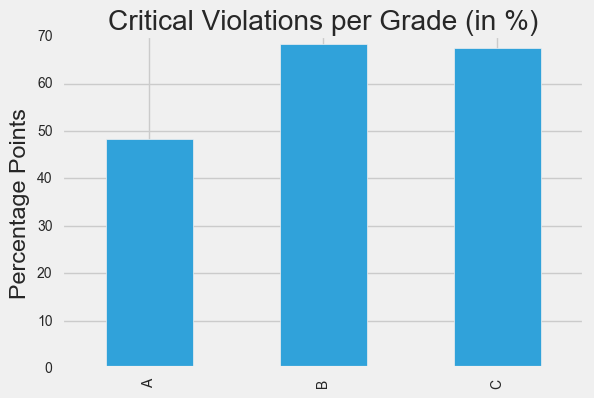

In [28]:
fig, ax = plt.subplots()
xlabels=['A','B','C']
dfcrit["Percentage With Critical Violation"].plot(ax=ax,kind="bar", title = "Critical Violations per Grade (in %)")
ax.set_xticklabels(xlabels)
ax.set_xlabel("")
ax.set_ylabel("Percentage Points")


#bar chart with the percentage of Critical Violation given grade. 
#~50% of A rated restaurants have critical violations

In [29]:
borograph = project[["BORO", "GRADE"]]

In [30]:
borograph = borograph.dropna()

In [31]:
borograph["Boro Grades"] = borograph["BORO"] + borograph["GRADE"]

In [32]:
combinedboro = borograph["Boro Grades"].value_counts()

In [33]:
manhattangrades = combinedboro.iloc[[0,4,7]]

In [34]:
brooklyngrades = combinedboro.iloc[[1,5,10]]

In [35]:
queensgrades = combinedboro.iloc[[2,6,9]]

In [36]:
bronxgrades = combinedboro.iloc[[3,8,11]]

## All boroughs have roughly the same grade distribution

All the boroughs are rated the same as one another. If DOHMH applies the same set of standards across all boroughs, we must reject our initial hypothesis that some boroughs are cleaner than others. 

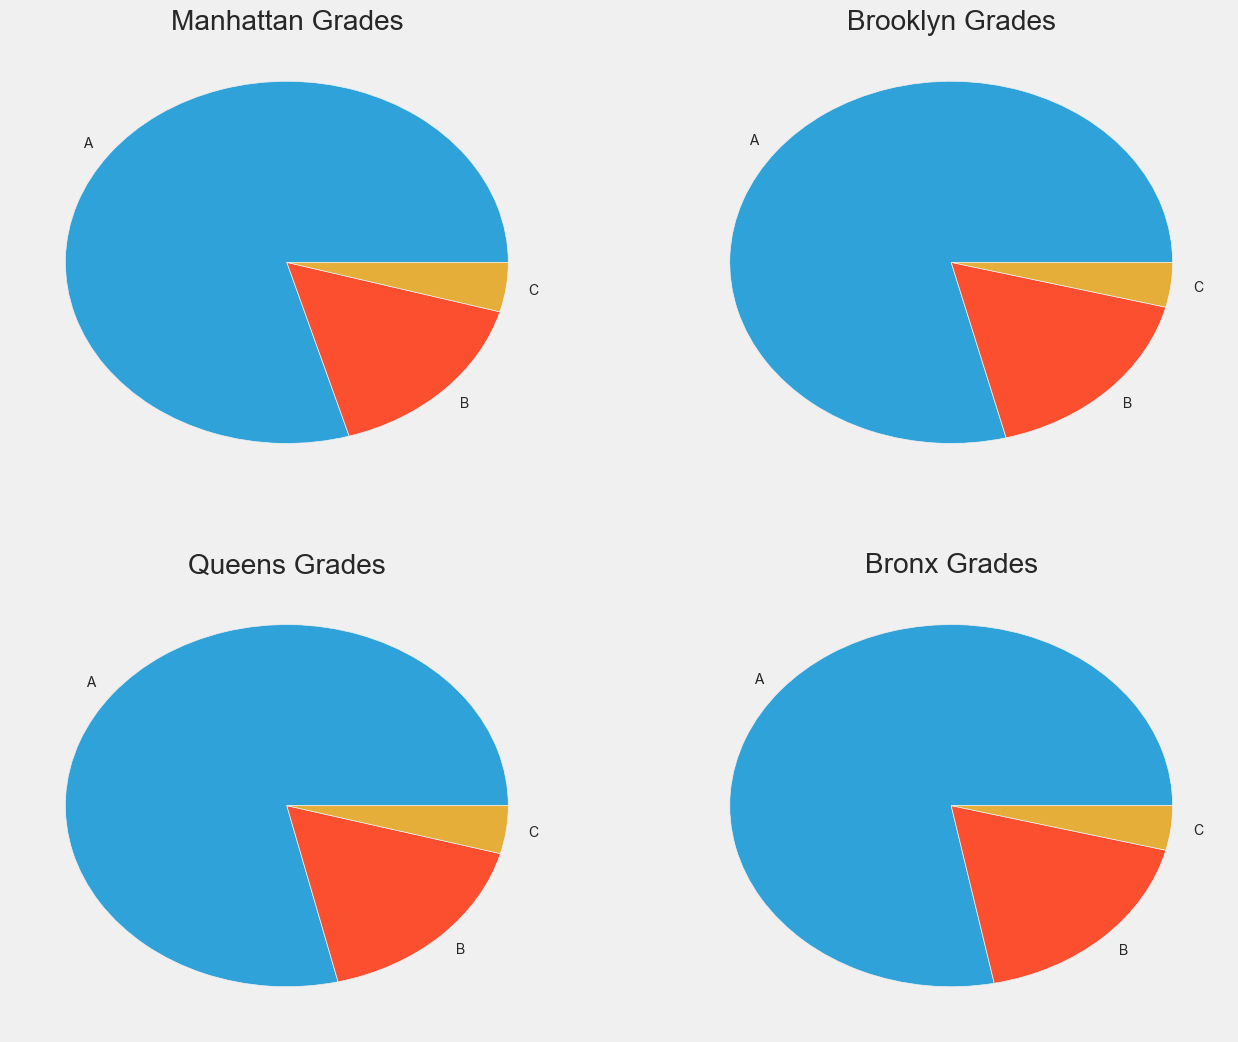

In [37]:
fig, ax = plt.subplots(2,2, figsize=(14,12))
queensgrades.plot(ax=ax[1,0],kind='pie',title='Queens Grades', labels = ["A","B","C"])
brooklyngrades.plot(ax=ax[0,1],kind="pie", title="Brooklyn Grades",labels = ["A","B","C"])
manhattangrades.plot(ax=ax[0,0],kind="pie",title="Manhattan Grades",labels = ["A","B","C"])
bronxgrades.plot(ax=ax[1,1],kind="pie",title="Bronx Grades",labels = ["A","B","C"])
ax[0,0].set_ylabel("")
ax[1,0].set_ylabel("")
ax[0,1].set_ylabel("")
ax[1,1].set_ylabel("")

In [38]:
#project['SCOREvalue'] = if project['GRADE'] == 'A': 

In [39]:
project['SCORE'] = project['SCORE'].astype(int)

In [40]:
project['SCORE'].dtype

dtype('int64')

## Almost all restaurants receive less than 25 points in score

The KDE plot below shows us that most restaurants have few health inspection violations.

/Users/Hubert/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


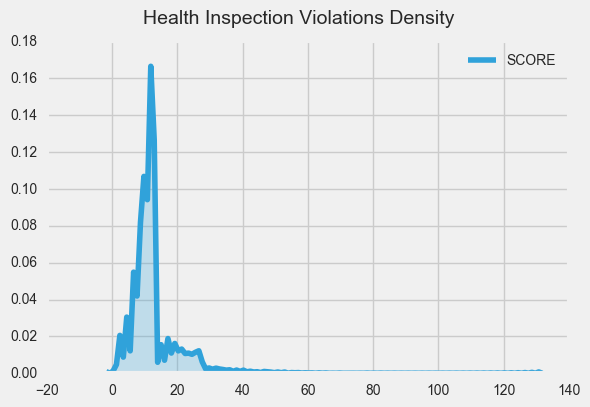

In [41]:
fig, ax = plt.subplots()

sns.kdeplot(project["SCORE"], shade=True, ax=ax)
ax.legend()

fig.suptitle("Health Inspection Violations Density")

plt.show()

In [42]:
scoregraph = project[["SCORE", "GRADE"]]

In [43]:
scoregraph = scoregraph.dropna()
scoregraph = scoregraph[scoregraph.GRADE != 'Z']
scoregraph = scoregraph[scoregraph.GRADE != 'P']
scoregraph = scoregraph[scoregraph.GRADE != 'Not Yet Graded']
scoregraph = scoregraph.reset_index()

In [44]:
ListOfGrades = []

### Data Manipulation:

We are manipulating the data so that we can use functions that typically take numbers instead of qualitative data. We decided to convert the A grade into the integer 1, the grade into the integer 2, and the C grade into the integer 3.

`{'A':1, 'B':2, 'C':3}`

In [45]:
for item in scoregraph["GRADE"]:
    if item == "A":
        ListOfGrades.append(1)
    if item == "B":
        ListOfGrades.append(2)
    if item == "C":
        ListOfGrades.append(3)
    if item == "NaN":
        ListOfGrades.append(5)

In [46]:
scoregraph["GradeIndex"] = pd.Series(ListOfGrades)

## The violin plot tells us that most C rated restaurants have more than 25 points


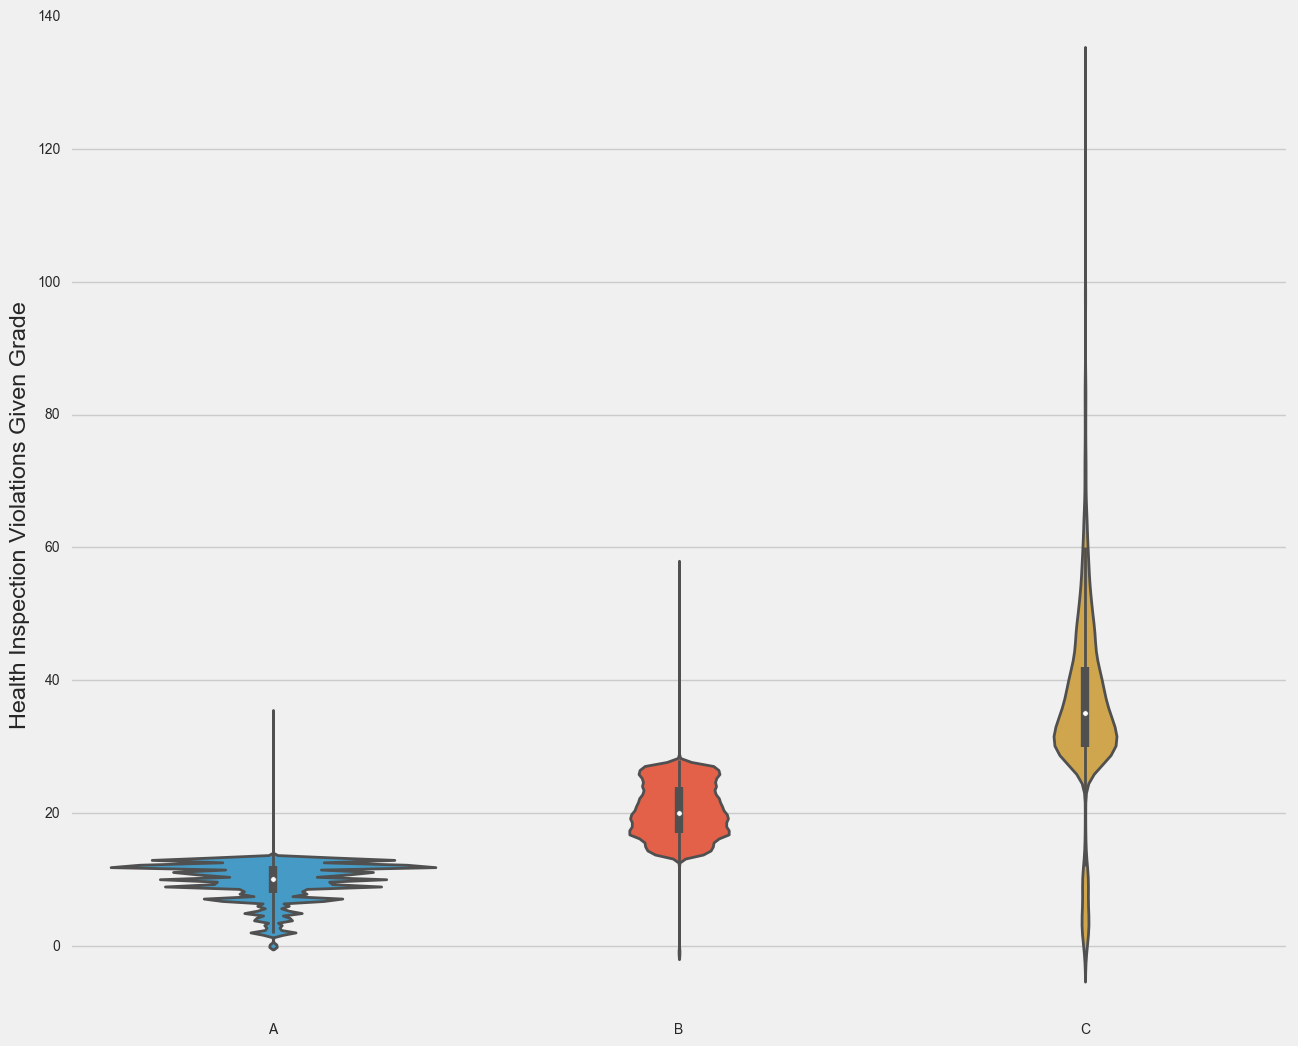

In [47]:
fig, ax = plt.subplots(figsize=(14,12))
sns.violinplot(x="GradeIndex", y="SCORE", data=scoregraph, linewidth = 2)
ax.set_xticklabels(xlabels)
ax.set_ylim(-10,140)
ax.set_xlabel("")
ax.set_ylabel("Health Inspection Violations Given Grade")
#df.corr will give a correlation.

## Conclusions

#### •     79% of restaurants have an A rating, 17% of restaurants have a B rating, and 4% of restaurants have a C rating.

#### •     Restaurant grade distributions remain constant for all four boroughs analyzed.

#### •     48% of A rated restaurants have one of more critical violation. 

#### •     Most C rated restaurants have more than 25 points in score, while most A rated restaurants have less than 15 points in score.

We should not blindly trust regulators about how safe our restaurants actually are. One of the biggest shocking revelations was that so many A rated restaurants have critical flag, since critical flags are given for obscene violations, like the presence of rodent feces. In conclusion, an A rating does not mean much, and those who actually care about a restaurants food safety should research its violation record specifically. We should learn to challenge the information presented around us, as the reality is in the data. 